# Análisis de datos - Trabajo final integrador
# Hernán Contigiani - 2021

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


## Descargar el dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Descargar el dataset
# Fuente
# https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

import gdown
import os
if os.access('weatherAUS.csv', os.F_OK) is False:
    if os.access('weatherAUS.zip', os.F_OK) is False:
        url = 'https://drive.google.com/uc?id=1s4hksBypmVNEXjnpFAY_mjJQK2GDoIsH&export=download'
        output = 'weatherAUS.zip'
        gdown.download(url, output, quiet=False)
    !unzip -q weatherAUS.zip   
else:
    print("La carpeta ya se encuentra descargada")

Downloading...
From: https://drive.google.com/uc?id=1s4hksBypmVNEXjnpFAY_mjJQK2GDoIsH&export=download
To: /content/weatherAUS.zip
4.02MB [00:00, 107MB/s]


## 1 - Análisis exploratorio inicial

#### Analizar tipos de variables en el dataset

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Visualizar los datos númericos
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
# Shape del dataset
print("Cantidad de filas del dataset:", df.shape[0])
print("Cantidad de coulmnas del dataset:", df.shape[1])

Cantidad de filas del dataset: 145460
Cantidad de coulmnas del dataset: 23


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# De los features del dataset se identificadores las siguientes variables categóricas
var_categoricas = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
var_salida = 'RainTomorrow'
var_compuesta = ['Date']

var_numericas = list(df.columns)

for feature in var_categoricas+[var_salida]+var_compuesta:
    var_numericas.remove(feature)

Analizar la __variable de salida__

[RainTomorrow] Cantidad de clases: 2
No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64


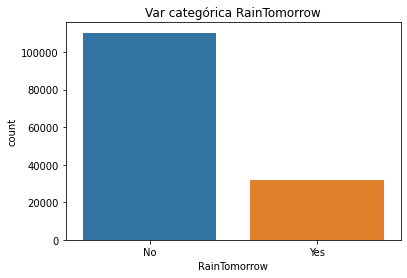

In [ ]:
feature = var_salida
print(f"[{feature}] Cantidad de clases: {df[feature].nunique()}")
print(df[feature].value_counts() / df[feature].value_counts().sum())
sns.countplot(x=feature, data=df).set_title(f"Var categórica {feature}")
plt.show()

In [ ]:
df[var_salida].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

- Se puede ver que la __salida no está muy balaceada__, pero es esperado en un dataset de lluvia. 
- La variable se trata de una variable categórica por lo tanto estamos ante un __problema de claisifacación__.
- Para trabajar esta variable se puede utilizar __codificación binaria --> 0 (no llueve) y 1 (lluve)__.

Analizar la distribución de los __datos numéricos__

In [ ]:
def display_dataset_distributions(df, features):
    fig = df[features].hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

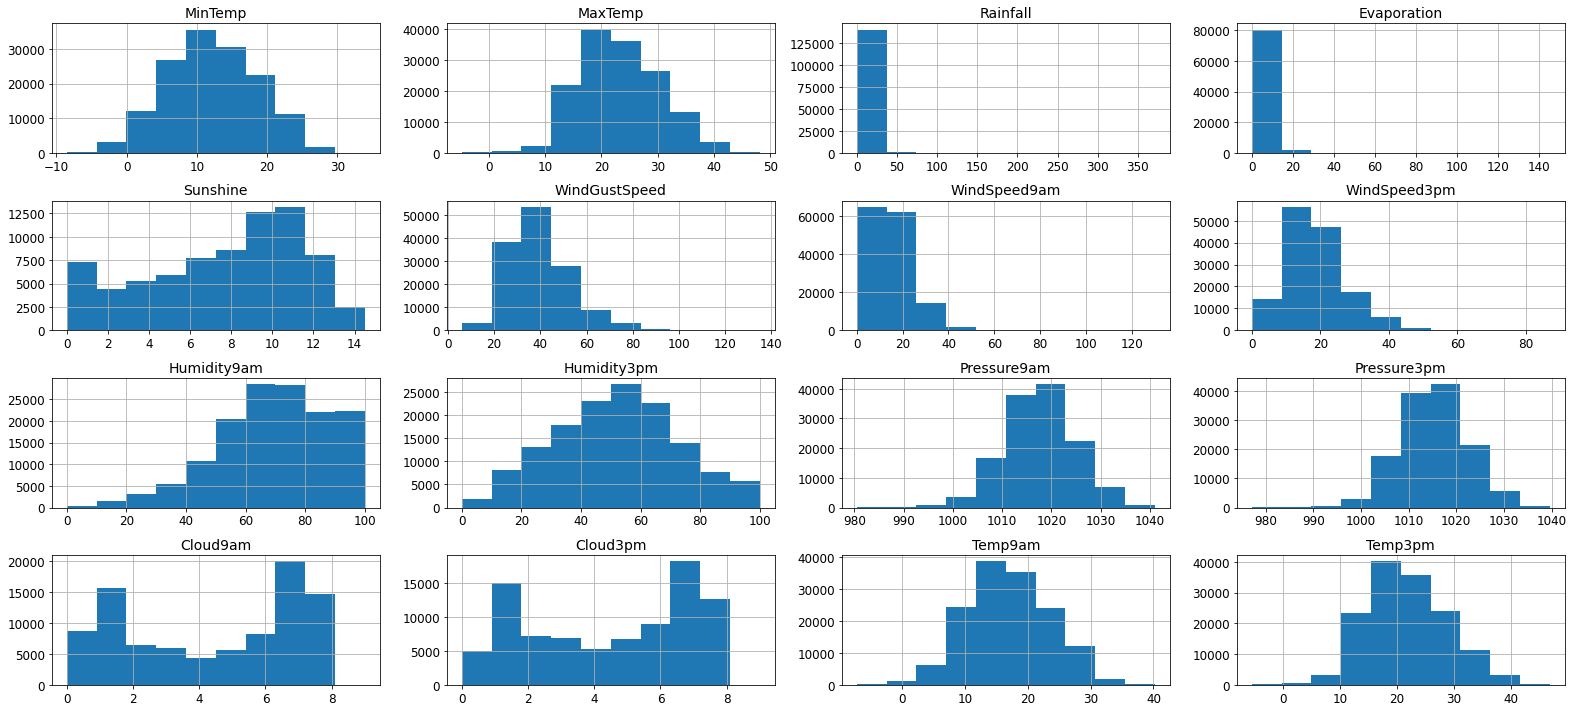

In [ ]:
display_dataset_distributions(df, var_numericas)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


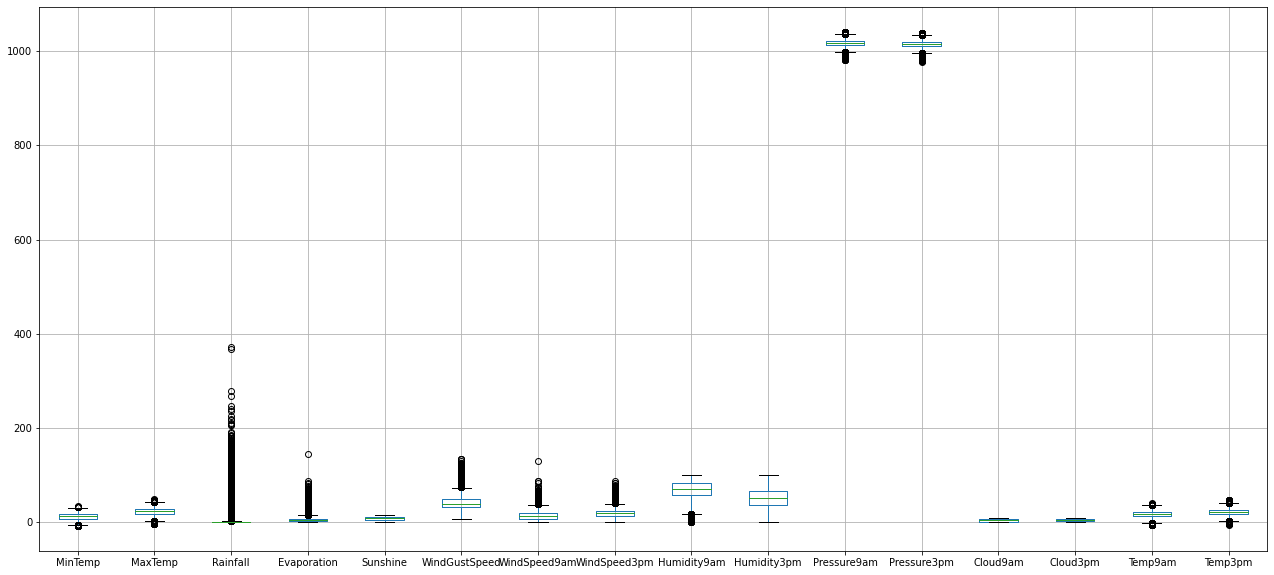

In [ ]:
df[var_numericas].boxplot(figsize=(22,10))
plt.show()

Se puede ver que hay algunos features como Rainfall y Evaporation que tienen muchos outliers pero en principio no sigue una distribución normal

Analizar la cardinalidad de las clases de los __datos categóricos__

[Location] Cantidad de clases: 49


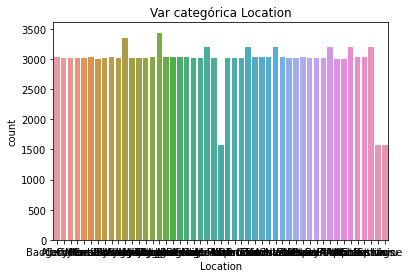

[WindGustDir] Cantidad de clases: 16


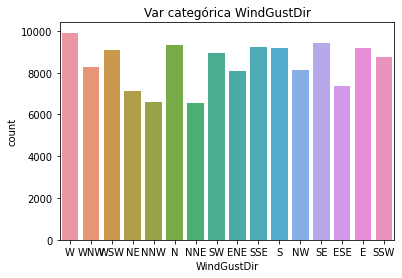

[WindDir9am] Cantidad de clases: 16


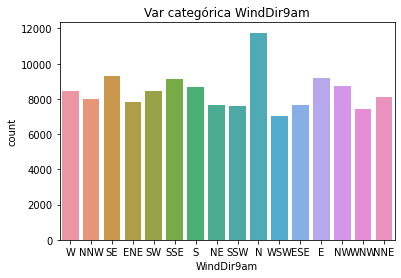

[WindDir3pm] Cantidad de clases: 16


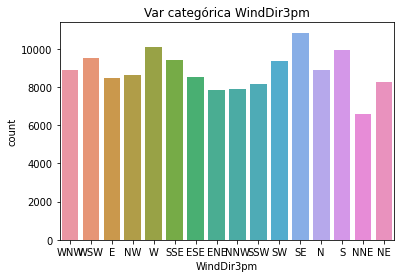

[RainToday] Cantidad de clases: 2


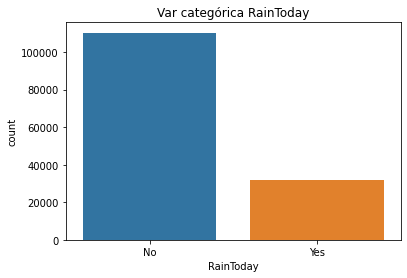

In [ ]:
for feature in var_categoricas:
    print(f"[{feature}] Cantidad de clases: {df[feature].nunique()}")
    sns.countplot(x=feature, data=df).set_title(f"Var categórica {feature}")
    plt.show()

Conclusión:
- Las clases de los features categóricos de entrada están balanceados.
- Los features relativos a la dirección del viento tienen las mismas clases, se puede usar el mismo encoder
- La variable de location tiene bastantes clases, es probable que sea un problema utilizar one-hot-encoding para este feature

Analizar los __datos compuestos__ (la fecha)

La fecha está compuesta por el año, mes y día.
- El año es una variable que en un análisis macro aporta valor porque da una idea de los ciclos del clima, pero para este caso donde se desea abordar un análisis micro (si llueve al día siguiente) descartaremos la variable año
- El mes es muy importante porque habla de las estaciones del año. Se puede trabajar esta variable como categórica por mes o categórica por estación.
- El día debería ser una variable muy volatil, se conoce que hay ciclos internos dentro de las estaciones pero el clima no es tan preciso.

In [ ]:
df_date = df.copy()
df_date['year'] = pd.DatetimeIndex(df['Date']).year
df_date['month'] = pd.DatetimeIndex(df['Date']).month
df_date['day'] = pd.DatetimeIndex(df['Date']).day
df_date.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


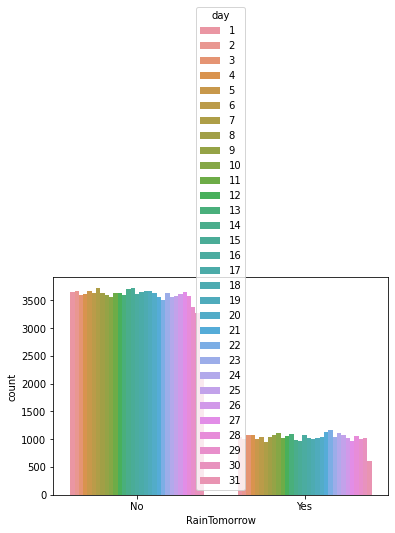

In [ ]:
sns.countplot(x=df_date[var_salida], hue=df_date['day'])

Se puede ver que la distribución entre los días y si llueve o no llueve es una distribución uniforme, por lo tanto que verifica el supuesto de que el día no aporta valor como resultado

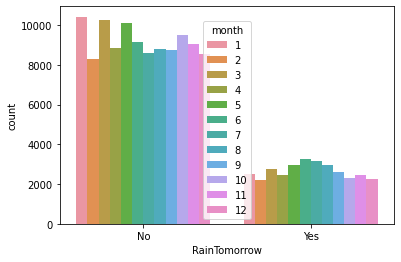

In [ ]:
sns.countplot(x=df_date[var_salida], hue=df_date['month'])

En los meses hay más variación y en el gráfico de llueve (Yes) parece haber una pequeña cresta en los meses intermedios del año (invierno)

Analizar en detalle más en detalle como se relacionan __los meses__ con el problema

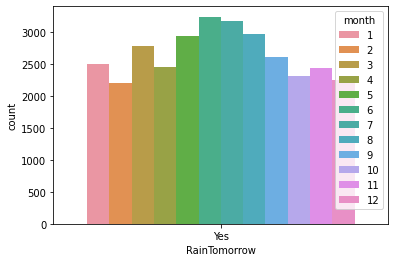

In [ ]:
df_date_llueve = df_date[df_date[var_salida] == 'Yes']
sns.countplot(x=df_date_llueve[var_salida], hue=df_date_llueve['month'])

Se puede ver que hay cierta variabilidad mes a mes que parece aportar valor al modelo. Ahora 

Analizar en detalle más en detalle como se relacionan __las estaciones__ con el problema

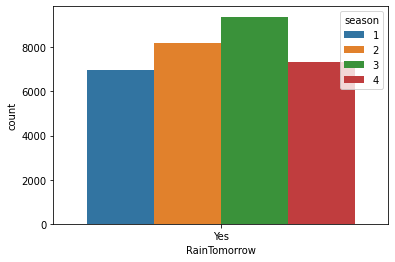

In [ ]:
df_date['season'] = df_date['month'] % 12  // 3 + 1 
df_date_llueve = df_date[df_date[var_salida] == 'Yes']
sns.countplot(x=df_date_llueve[var_salida], hue=df_date_llueve['season'])

Se ver que analizar por temporada es un resumen de lo que puede verse mes a mes, pero se pierde características o particularidades de los meses dentro de la estación (como por ejempo que en Febrero llueva menos que Enero y Marzo)

Conclusión:
Se transformará la variable compuesta "Data" unicamente en mes

In [ ]:
df2 = df_date.drop(['season', 'Date', 'year', 'day'], axis=1)
df2[var_salida] = df2[var_salida].replace({"No": 0, "Yes": 1})
df2['RainToday'] = df2['RainToday'].replace({"No": 0, "Yes": 1})
df2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,12


#### 2 - Separar datos en train & validation

Primero transformar las columnas tipo texto en un número que represente cada clase (LabelEncoding)

In [ ]:
def label_encoder_with_nan(df, column):
    encoder = {}
    df_encoded = df.copy()
    for i, value in enumerate(df_encoded[column].dropna().unique()):
        encoder[value] = i
    return encoder

In [ ]:
wind_label_encoder = label_encoder_with_nan(df2, 'WindGustDir')
len(wind_label_encoder)

16

In [ ]:
location_label_encoder = label_encoder_with_nan(df2, 'Location')
len(location_label_encoder)

49

In [ ]:
df3 = df2.copy()
df3['WindGustDir'] = df3['WindGustDir'].replace(wind_label_encoder)
df3['WindDir9am'] = df3['WindDir9am'].replace(wind_label_encoder)
df3['WindDir3pm'] = df3['WindDir3pm'].replace(wind_label_encoder)
df3['Location'] = df3['Location'].replace(location_label_encoder)

Por ahora se seguirá utilizando la estructura de dataframe para poder hacer análisis de los elementos faltantes luego. Se Separará el dataframe original utilizando índices mezclados 70%30%

In [ ]:
from sklearn.model_selection import train_test_split
train_idx, val_idx = train_test_split(
    df3.index.values,
    test_size=0.3,
    random_state=42)

train_idx.shape, val_idx.shape

((101822,), (43638,))

In [ ]:
# Obtener los nuevos dataframes separados en train y val
df_train = df3.filter(train_idx, axis=0).reset_index(drop=True)
df_val = df3.filter(val_idx, axis=0).reset_index(drop=True)
df_train.shape, df_val.shape

((101822, 23), (43638, 23))

#### 3 - Limpieza y preparación de datos

In [ ]:
def null_analysis(df):
    sum_missing = df.isnull().sum()
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing
                                 })
    return missing_value_df

In [ ]:
def null_grouped(df, column, groupedby):
    print(f"Analisis para {column} por {groupedby}")
    df_mask = df[df['Evaporation'].isnull()]
    count_0 = df_mask[df_mask[groupedby] == 0][column].isnull().sum()
    count_1 = df_mask[df_mask[groupedby] == 1][column].isnull().sum()
    print(f"{var_salida} 0: {count_0} | {100*(count_0/(count_0+count_1)):.2f}%")
    print(f"{var_salida} 1: {count_1} | {100*(count_1/(count_0+count_1)):.2f}%")

In [ ]:
null_analysis(df_train)

,column_name,sum_missing,percent_missing
Location,Location,0,0.000000
MinTemp,MinTemp,1025,1.006659
MaxTemp,MaxTemp,863,0.847558
Rainfall,Rainfall,2282,2.241166
Evaporation,Evaporation,43955,43.168470
Sunshine,Sunshine,48920,48.044627
WindGustDir,WindGustDir,7186,7.057414
WindGustSpeed,WindGustSpeed,7145,7.017148
WindDir9am,WindDir9am,7396,7.263656
WindDir3pm,WindDir3pm,2964,2.910962


Hay varios features que la cantidad de elementos faltantes es muy baja, __filtrar aquellos cuya cantidad de faltantes sea menor o igual al 5%__

In [ ]:
drop_columns = df_train.columns[(df_train.isna().mean().round(4) * 100.0) <= 5]
df_train2 = df_train.dropna(subset=drop_columns)
df_val2 = df_val.dropna(subset=drop_columns)
print("Lost train data: ", 100 - 100*(df_train2.shape[0]/ df_train.shape[0]))
print("Lost val data: ", 100 - 100*(df_val2.shape[0]/ df_val.shape[0]))
null_analysis(df_train2)

Lost train data:  7.507218479307028
Lost val data:  7.3926394426875675


,column_name,sum_missing,percent_missing
Location,Location,0,0.000000
MinTemp,MinTemp,0,0.000000
MaxTemp,MaxTemp,0,0.000000
Rainfall,Rainfall,0,0.000000
Evaporation,Evaporation,39276,41.704007
Sunshine,Sunshine,43311,45.988447
WindGustDir,WindGustDir,4208,4.468135
WindGustSpeed,WindGustSpeed,4199,4.458578
WindDir9am,WindDir9am,5310,5.638259
WindDir3pm,WindDir3pm,0,0.000000


In [ ]:
# Analizar los que quedan de poco porcentaje
menor_faltantes = ['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'Pressure9am', 'Pressure3pm']

In [ ]:
for col in menor_faltantes:
    null_grouped(df_train2, col, var_salida)

Analisis para WindGustDir por RainTomorrow
RainTomorrow 0: 1139 | 76.39%
RainTomorrow 1: 352 | 23.61%
Analisis para WindGustSpeed por RainTomorrow
RainTomorrow 0: 1139 | 76.49%
RainTomorrow 1: 350 | 23.51%
Analisis para WindDir9am por RainTomorrow
RainTomorrow 0: 2726 | 82.43%
RainTomorrow 1: 581 | 17.57%
Analisis para Pressure9am por RainTomorrow
RainTomorrow 0: 6193 | 79.28%
RainTomorrow 1: 1619 | 20.72%
Analisis para Pressure3pm por RainTomorrow
RainTomorrow 0: 6179 | 79.31%
RainTomorrow 1: 1612 | 20.69%


In [ ]:
for col in menor_faltantes:
    null_grouped(df_train2, col, 'RainToday')

Analisis para WindGustDir por RainToday
RainTomorrow 0: 1150 | 77.13%
RainTomorrow 1: 341 | 22.87%
Analisis para WindGustSpeed por RainToday
RainTomorrow 0: 1150 | 77.23%
RainTomorrow 1: 339 | 22.77%
Analisis para WindDir9am por RainToday
RainTomorrow 0: 2771 | 83.79%
RainTomorrow 1: 536 | 16.21%
Analisis para Pressure9am por RainToday
RainTomorrow 0: 6168 | 78.96%
RainTomorrow 1: 1644 | 21.04%
Analisis para Pressure3pm por RainToday
RainTomorrow 0: 6157 | 79.03%
RainTomorrow 1: 1634 | 20.97%


Los datos pocos faltantes podrían decirse que están relacionado con la salida, pero, el dataset no es balanceado y los datos siguen la misma proporsión. Se puede decir que fueron aleatoriamente no completaods __(MCAR)__

Para los features que hayan quedado con pocos datos faltantes numéricos se puede:
- Descartar las filas
- Reemplazar por la media o mediana
- Imputación por valor aleatorio
- Imputación multivariada

Para los fatures que hayan quedado con pocos datos faltantes categóricos se puede:
- Desctar las filas
- Reemplazar por la moda o categoría frecuente
- Imputación por valor aleatorio

Analizar __datos con mayor cantidad de faltantes__

In [ ]:
mayor_faltantes = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
col_analizar = mayor_faltantes + ['RainToday', var_salida]
print(col_analizar)
df_mayor_faltentes = df_train2[col_analizar]
df_mayor_faltentes.head()

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']


,Evaporation,Sunshine,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,4.8,11.1,1.0,1.0,0.0,0.0
1,4.6,11.5,1.0,2.0,0.0,0.0
4,NaN,9.1,NaN,NaN,1.0,0.0
5,NaN,NaN,1.0,NaN,1.0,0.0
6,5.2,6.6,7.0,7.0,0.0,0.0


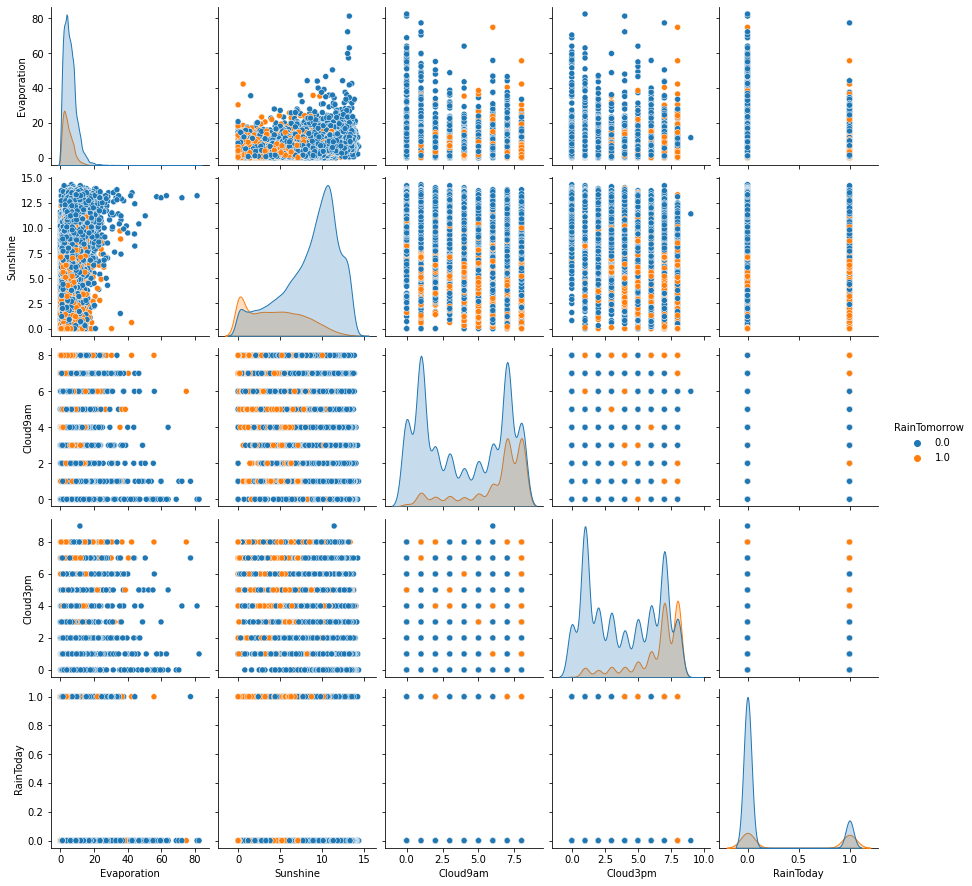

In [ ]:
sns.pairplot(df_mayor_faltentes, hue=var_salida)

Entre las clases faltantes no parece haber una relación que permita determinar una en función de otra. Veremos ahora la relación de faltanes con la salida:

In [ ]:
for col in mayor_faltantes:
    null_grouped(df_train2, col, var_salida)

Analisis para Evaporation por RainTomorrow
RainTomorrow 0: 30608 | 77.93%
RainTomorrow 1: 8668 | 22.07%
Analisis para Sunshine por RainTomorrow
RainTomorrow 0: 28613 | 77.91%
RainTomorrow 1: 8113 | 22.09%
Analisis para Cloud9am por RainTomorrow
RainTomorrow 0: 23287 | 80.36%
RainTomorrow 1: 5690 | 19.64%
Analisis para Cloud3pm por RainTomorrow
RainTomorrow 0: 23352 | 80.95%
RainTomorrow 1: 5497 | 19.05%


In [ ]:
for col in mayor_faltantes:
    null_grouped(df_train2, col, 'RainToday')

Analisis para Evaporation por RainToday
RainTomorrow 0: 30475 | 77.59%
RainTomorrow 1: 8801 | 22.41%
Analisis para Sunshine por RainToday
RainTomorrow 0: 28562 | 77.77%
RainTomorrow 1: 8164 | 22.23%
Analisis para Cloud9am por RainToday
RainTomorrow 0: 23352 | 80.59%
RainTomorrow 1: 5625 | 19.41%
Analisis para Cloud3pm por RainToday
RainTomorrow 0: 23209 | 80.45%
RainTomorrow 1: 5640 | 19.55%


Los datos pocos faltantes podrían decirse que están relacionado con la salida, pero, el dataset no es balanceado y los datos siguen la misma proporsión. Se puede decir que fueron aleatoriamente no completaods __(MCAR)__

Para estos features se puede tomar las siguientes estrategías:
- Descartar las filas (se perderá gran parte del dataset, pero capaz sea peor la cura que la enfermedad)
- Imputación por media o mediana
- Imputación por valor aleatorio
- Imputación multivariada

Analizar si hay varias filas que comparten todos los faltantes

In [ ]:
df_train3 = df_train2.copy()
faltantes = mayor_faltantes + menor_faltantes
df_faltantes = df_train3[faltantes]
mask_check = np.ones(shape=df_faltantes.shape[1])
mask_full_faltantes = []
for idx, row in df_faltantes.isnull().iterrows():
    values = row.values
    if (values == mask_check).all(-1):
        mask_full_faltantes.append(idx)

mask_full_faltantes

[8293, 51029, 96720, 100144]

Solo 4 filas tienen faltantes todos los faltantes, es despreciable

__Conclusión__:
Se descartaron aquellas filas cuyas columnas tenian una cantidad baja de faltantes (<=5%).

Para los datos faltantes restantes se tomarán dos estrategías o caminos durante el entrenamiento:
- Descartar todas aquellas filas que aún esten faltantes
- Utilizar el imputador de mediana, KNN y valor arbitrario según cada columna según lo mencionado antes.

__Relación entre las variables de entrada__

In [ ]:
var_categoricas2 = var_categoricas + ['month']
var_categoricas2

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'month']

In [ ]:
var_entrada = var_categoricas2 + var_numericas
var_entrada

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
df_entrada = df_train2.copy()[var_entrada]

In [ ]:
# Análisis de varianza
var = np.nanstd(df_entrada.values, axis=0)**2
mask = var<=0.01
print("Cantidad de columnas de baja varianza:", np.count_nonzero(mask == 1))

Cantidad de columnas de baja varianza: 0


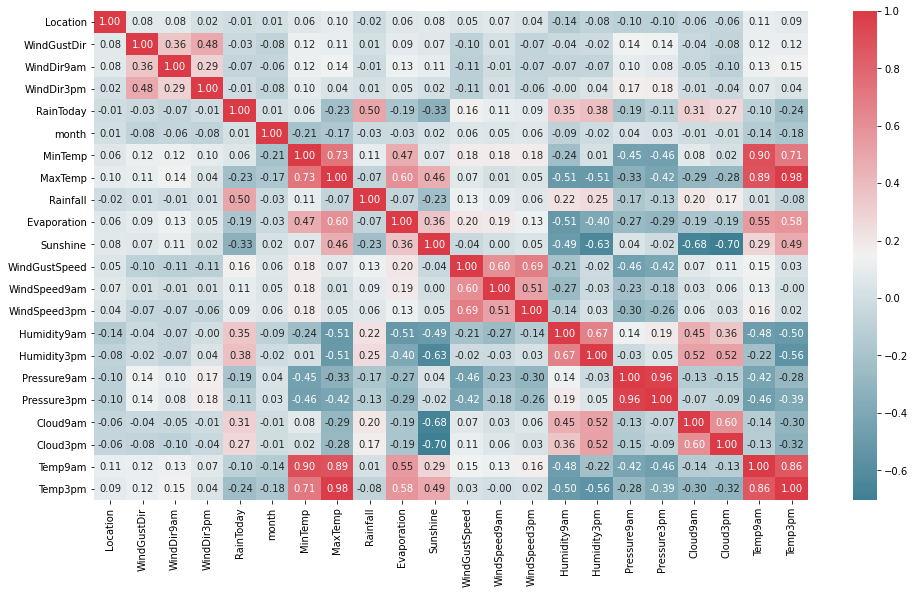

In [ ]:
# Analizar la correlación entre las variables

corr = df_entrada.corr()
ax = plt.figure(figsize=(16,9)).add_subplot()
sns.heatmap(corr, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f", ax=ax)
sns.set(font_scale=0.9)

La relación más fuerte es la de la máxima temperatura "MaxTemp" y la temperatura a las 3pm "Temp3pm". Por una sola relación no descartaremos ninguna columna

__Relación entre las variables de entrada y la salida__

Análisis Numérica - Categórica

In [ ]:
df_dropna = df_train2[var_numericas + [var_salida]].dropna()

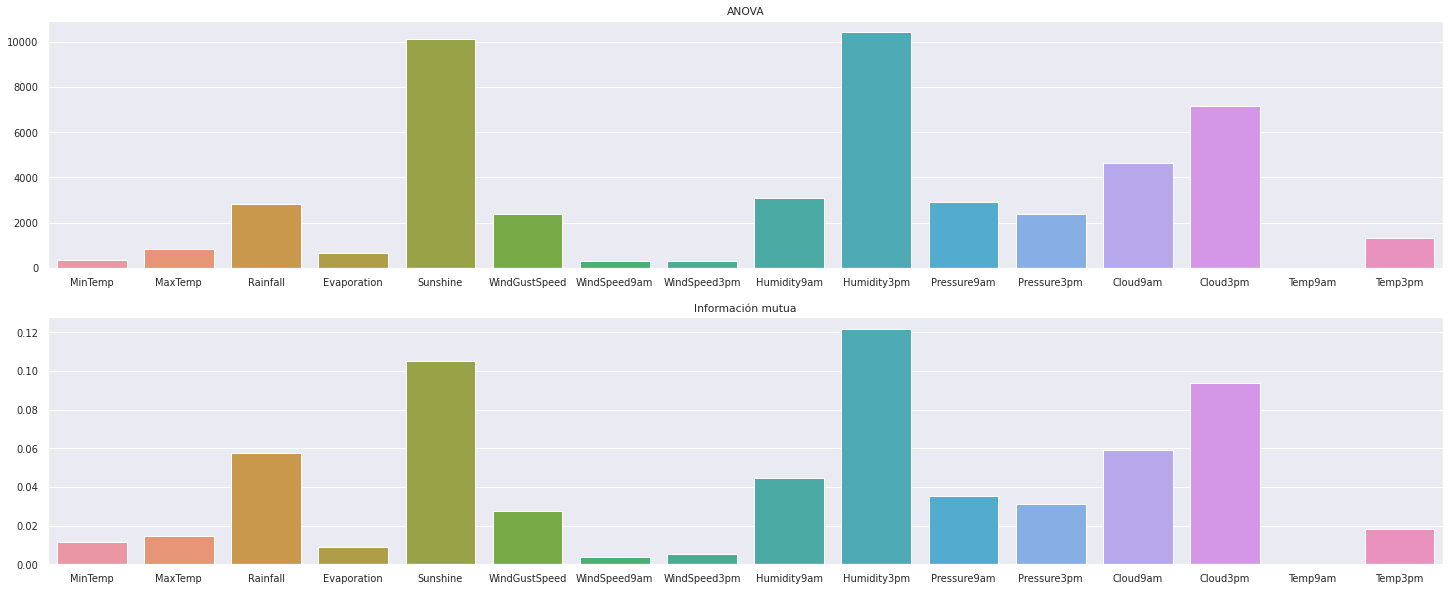

In [ ]:
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest

def select_features_anova(X_train, y_train, k= 'all'):  
  fs = SelectKBest(score_func=f_classif, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  return X_train_fs, fs
def select_features_mi(X_train, y_train, k= 'all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  return X_train_fs, fs

fig, ax = plt.subplots(2,1, figsize=(25,10))

ax[0].set_title('ANOVA')
X_train_anova, anova = select_features_anova(df_dropna[var_numericas].values, df_dropna[var_salida].values)
sns.barplot( x =df_dropna[var_numericas].columns.values, y = anova.scores_,ax=ax[0])

ax[1].set_title('Información mutua')
X_train_mi, mi = select_features_mi(df_dropna[var_numericas].values, df_dropna[var_salida].values)
sns.barplot( x =df_dropna[var_numericas].columns.values, y = mi.scores_,ax=ax[1])

Conclusión:
- El resultado entre ANOVE y Información mutua es muy similar
- "Sunshine" y "Cloud3pm" sonunas de las variables más importante de entrada y una de las más faltantes en el dataset

Análisis categórica - categórica

In [ ]:
df_dropna2 = df_train2[var_categoricas2 + [var_salida]].dropna()

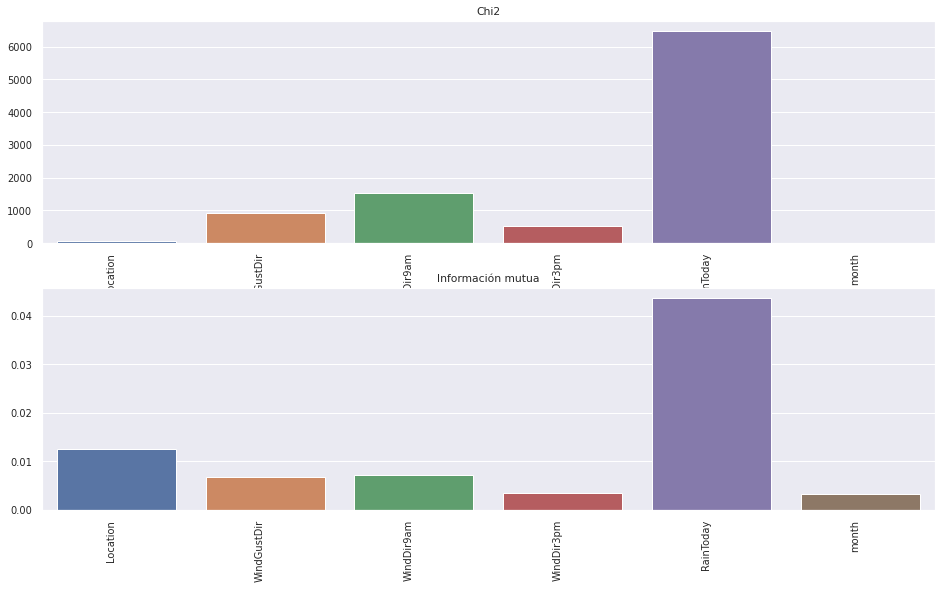

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

def select_features_chi2(X_train, y_train, k= 'all'):  
  fs = SelectKBest(score_func=chi2, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  return X_train_fs, fs

def select_features_mutual_info(X_train, y_train, k= 'all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)
  return X_train_fs, fs

fig, ax = plt.subplots(2,1, figsize=(16,9))

ax[0].set_title('Chi2')
X_train_fs, fs = select_features_chi2(df_dropna2[var_categoricas2].values, df_dropna2[var_salida].values)
bar = sns.barplot( x = [c for c in df_dropna2[var_categoricas2].columns], y = fs.scores_,ax=ax[0])
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')

ax[1].set_title('Información mutua')
X_train_fs, fs = select_features_mutual_info(df_dropna2[var_categoricas2].values, df_dropna2[var_salida].values)
bar = sns.barplot( x = [c for c in df_dropna2[var_categoricas2].columns], y = fs.scores_,ax=ax[1])
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

Conclusión:
- A diferencia de lo que se pensaba, la variable "month" no aporta tanto valor como era esperado.
- "Location" si está bastante relacionada con la salida.
- "RainToday", como era esperado, está muy relacionado con la salida.

__Conclusión:__ No hay información suficiente que justifique eliminar alguna culmna, considerendo que las columnas con datos faltantes en parte son las más valiosas

## 3 - Entrenar el modelo

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Obtener un dataset sin NaN
df_train4 = df_train2.dropna()
df_val4 = df_val2.dropna()
print("Lost train data: ", 100 - 100*(df_train4.shape[0]/ df_train2.shape[0]))
print("Lost val data: ", 100 - 100*(df_val4.shape[0]/ df_val2.shape[0]))
null_analysis(df_train4)

Lost train data:  58.00399243984795
Lost val data:  58.257448282688316


,column_name,sum_missing,percent_missing
Location,Location,0,0.0
MinTemp,MinTemp,0,0.0
MaxTemp,MaxTemp,0,0.0
Rainfall,Rainfall,0,0.0
Evaporation,Evaporation,0,0.0
Sunshine,Sunshine,0,0.0
WindGustDir,WindGustDir,0,0.0
WindGustSpeed,WindGustSpeed,0,0.0
WindDir9am,WindDir9am,0,0.0
WindDir3pm,WindDir3pm,0,0.0


[RainTomorrow] Cantidad de clases: 2
0.0    0.781573
1.0    0.218427
Name: RainTomorrow, dtype: float64


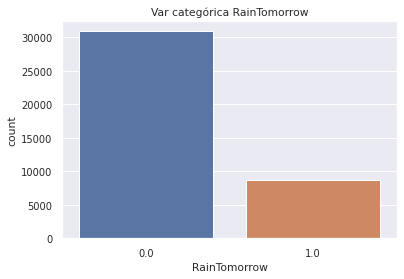

In [ ]:
feature = var_salida
print(f"[{feature}] Cantidad de clases: {df_train4[feature].nunique()}")
print(df_train4[feature].value_counts() / df_train4[feature].value_counts().sum())
sns.countplot(x=feature, data=df_train4).set_title(f"Var categórica {feature}")
plt.show()

Luego de eliminar todos los faltantes en el dataset nuevo se puede observar que la proporción de datos para "Yes" / "No" de la variable de salida se mantiene

In [ ]:
# Datasets utilizadas para cada ensayo
datasets = [
            [df_train4, df_val4],
            [df_train2, df_val2],
            [df_train2, df_val2],
            #[df_train2, df_val2]
            ]

__NOTA IMPORTANTE__:
Se descartó el uso del imputador por KNN o el clasificador por KNN porque el tiempo de preprocesamiento y entrenamiento del modelo se disparaba a casi 2 horas.

__1__ - Estrategías para los datos numéricos

In [ ]:
numeric_transformers = []

# 1 - Imputación descartando todos los faltantes (la imputación se realizó sobre el dataset)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
numeric_transformers.append(numeric_transformer)

# 2 - Imputación por la mediana 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
numeric_transformers.append(numeric_transformer)

# 3 - Imputación por la mediana + QuantileTransformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ( 'qt' , QuantileTransformer(output_distribution= 'normal'))
    ])
numeric_transformers.append(numeric_transformer)

# # 4 - Imputación por KNN
# numeric_transformer = Pipeline(steps=[
#     ('imputer', KNNImputer(n_neighbors=2, weights="uniform")),
#     ('scaler', StandardScaler())])
# numeric_transformers.append(numeric_transformer)

__2__ - Estrategías para los datos categóricos

In [ ]:
categorical_transformers = []

# 1 - Imputación descartando todos los faltantes + OneHotEncoder (la imputación se realizó sobre el dataset)
categorical_transformer = Pipeline(steps=[    
    ('coder', OneHotEncoder(handle_unknown='ignore'))])
categorical_transformers.append(categorical_transformer)

# 2 - Imputación por el valor más frecuente + OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('coder', OneHotEncoder())
    ])
categorical_transformers.append(categorical_transformer)

# 3 - Imputación por el valor más frecuente + OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('coder', OneHotEncoder())
    ])
categorical_transformers.append(categorical_transformer)

# # 4 - Imputación por KNN + OneHotEncoder
# categorical_transformer = Pipeline(steps=[
#     ('imputer', KNNImputer(n_neighbors=2, weights="uniform")),
#     ('coder', OneHotEncoder())
#     ])
# categorical_transformers.append(categorical_transformer)

__3__ - Cadena de preprocesamientos

In [ ]:
preprocessors = []

for i in range(len(numeric_transformers)):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformers[i], var_numericas),
            ('cat', categorical_transformers[i], var_categoricas2)])
    preprocessors.append(preprocessor)

__4__ - Clasificadores

In [ ]:
clasificadores = {}

# LogisticRegression
clfs = []
for i in range(len(preprocessors)):
    clf = Pipeline(steps=[('preprocessor', preprocessors[i]),
                      ('classifier', LogisticRegression())])
    clfs.append(clf)
clasificadores['lr'] = clfs

# Adaboost
clfs = []
for i in range(len(preprocessors)):
    clf = Pipeline(steps=[('preprocessor', preprocessors[i]),
                      ('classifier', AdaBoostClassifier(n_estimators=50, random_state=0))])
    clfs.append(clf)
clasificadores['ada'] = clfs

# RandomForest
clfs = []
for i in range(len(preprocessors)):
    clf = Pipeline(steps=[('preprocessor', preprocessors[i]),
                      ('classifier', RandomForestClassifier(n_estimators=50, criterion='entropy', random_state = 0))])
    clfs.append(clf)
clasificadores['rf'] = clfs

In [ ]:
import time
scores = {}
times = {}

for clasificador in clasificadores.keys():
    print(clasificador)
    pipelines = clasificadores[clasificador]
    
    for i in range(len(pipelines)):
        t1 = time.time()
        df_train_pipe, df_valid_pipe = datasets[i]

        X_train = df_train_pipe[var_categoricas2 + var_numericas]
        X_valid = df_valid_pipe[var_categoricas2 + var_numericas]

        y_train = df_train_pipe[var_salida]
        y_valid = df_valid_pipe[var_salida]

        pipeline = pipelines[i]

        pipeline.fit(X_train, y_train)
        score = pipeline.score(X_valid, y_valid)
        t2 = time.time()

        print(f'{clasificador}{i+1} score: {score}, time {(t2-t1):.2f}')
        scores[f'{clasificador}{i+1}'] = score
        times[f'{clasificador}{i+1}'] = t2-t1

lr


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lr1 score: 0.8568379868397652, time 0.88


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lr2 score: 0.8543501930119767, time 2.37


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lr3 score: 0.854300702761556, time 3.08
ada
ada1 score: 0.8499021874444247, time 4.00
ada2 score: 0.8467286944471939, time 9.66
ada3 score: 0.8467286944471939, time 10.38
rf
rf1 score: 0.8599205643488055, time 27.44
rf2 score: 0.857938236167475, time 105.17
rf3 score: 0.8582104325447887, time 110.85


## 5 - Evaluación de resultados

In [ ]:
scores

{'ada1': 0.8499021874444247,
 'ada2': 0.8467286944471939,
 'ada3': 0.8467286944471939,
 'lr1': 0.8568379868397652,
 'lr2': 0.8543501930119767,
 'lr3': 0.854300702761556,
 'rf1': 0.8599205643488055,
 'rf2': 0.857938236167475,
 'rf3': 0.8582104325447887}

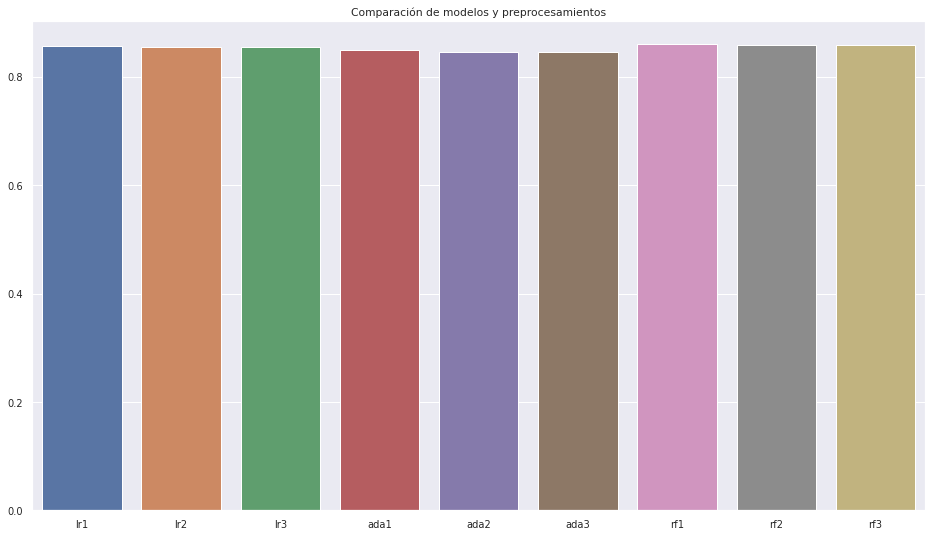

In [ ]:
ax = plt.figure(figsize=(16,9)).add_subplot()
ax.set_title('Comparación de modelos y preprocesamientos')
sns.barplot(x=list(scores.keys()), y=list(scores.values()), ax=ax)
plt.show()

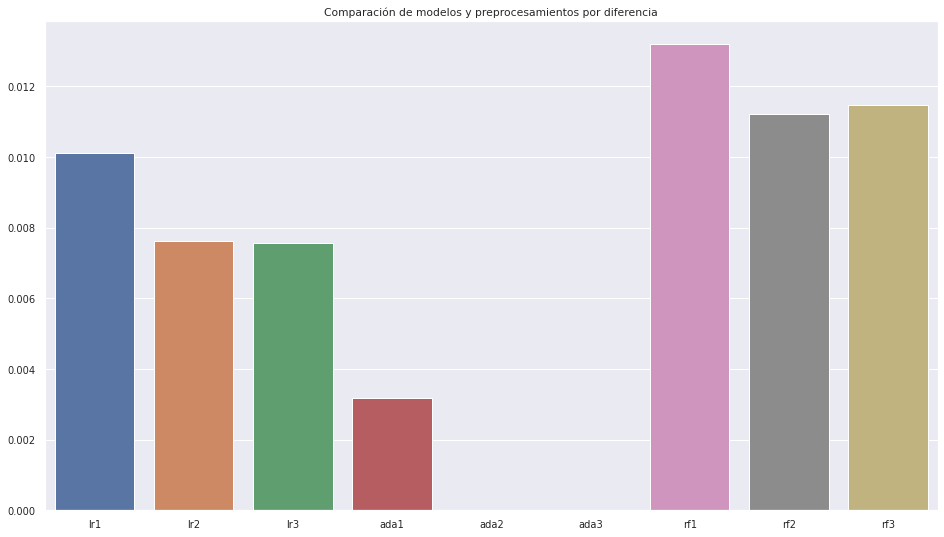

In [ ]:
# Observando por diferencia respecto al menor score
min_score = min(scores.items(), key=lambda x: x[1])[1]
scores_diff = {}
for k,v in scores.items():
    scores_diff[k] = v-min_score

ax = plt.figure(figsize=(16,9)).add_subplot()
ax.set_title('Comparación de modelos y preprocesamientos por diferencia')
sns.barplot(x=list(scores_diff.keys()), y=list(scores_diff.values()), ax=ax)
plt.show()

__Conclusiones de resultados__:
- El modelo que mejor score obtuvo es el randomforest (uno de los favoritos)
- El mejor preprocesamiento en todos los casos fue directamente eliminar todos los faltantes (dropna).
- No tuvo impacto la transformación de las distribuciónes a una normal

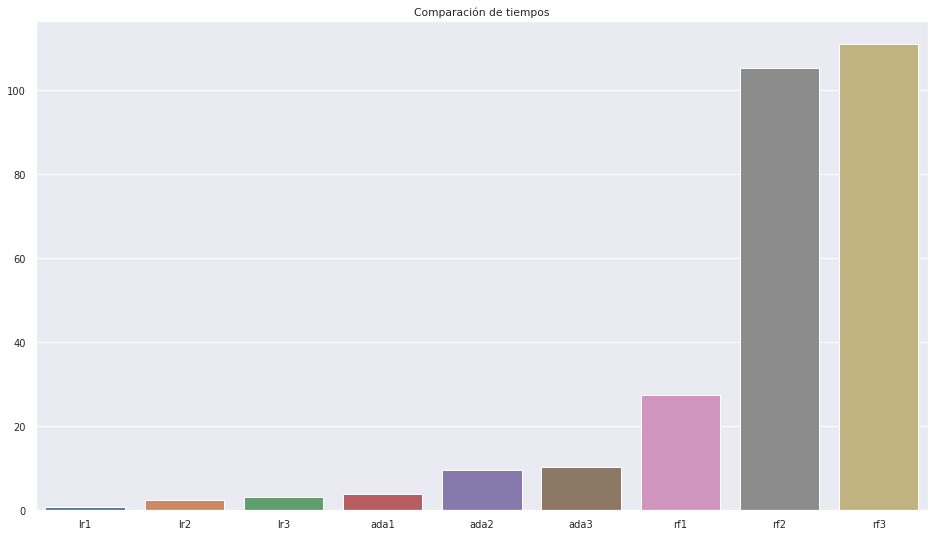

In [ ]:
ax = plt.figure(figsize=(16,9)).add_subplot()
ax.set_title('Comparación de tiempos')
sns.barplot(x=list(times.keys()), y=list(times.values()), ax=ax)
plt.show()

__Conclusiones de tiempos__:
- Como es de esperarse el dataset con menso filas (aquel que se eliminaron todos los faltantes) requirió menos tiempo de procesamiento en todos los casos
- El RandomForest tuvo el mejor score pero fue el más costoso de entrenar y computar.

## Conclusión final

- El dataset analizado tiene un montón de filas, por lo que permitio eliminar todas aquellas con faltantes sin afectar la predicción del modelo. 
- El punto anterior está respaldado ya que se analizó  que los datos faltantes eran aleatorios y solo la mitad de aquellas columnas con faltantes estaban muy correlacionada con la salida.
- Reemplazar los datos faltantes por datos estadísticos no ayudo a obtener una mejor score.
- Costo beneficio, el modelo más conveniente a utilizar es la regresión logística, ya que es aquel que menos tiempo de computo requerió y la performance es muy similar a la mejor obtenida por RandomForest